In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from keras import regularizers
from keras.callbacks import EarlyStopping

# Load the California housing dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target

print(housing.DESCR)
print(X.shape, y.shape)
print(housing.feature_names)

2024-04-01 18:43:54.728593: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [2]:
import pandas as pd

housing_df = pd.DataFrame(X, columns=housing.feature_names)
housing_df['MedHouseValue'] = pd.Series(y)
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
housing_df.describe()
sample_df = housing_df.sample(frac=0.1, random_state=17)

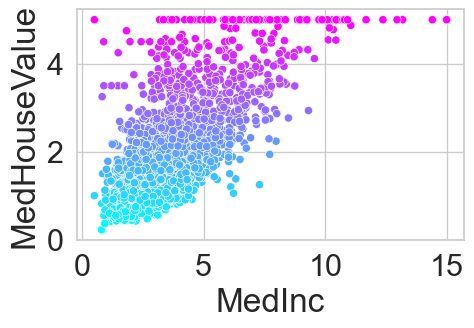

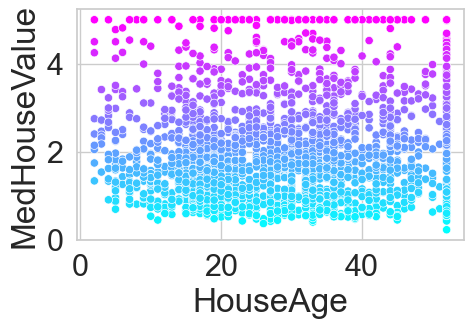

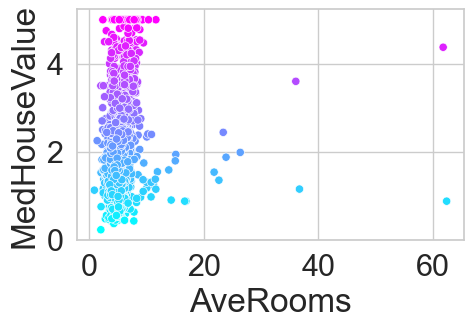

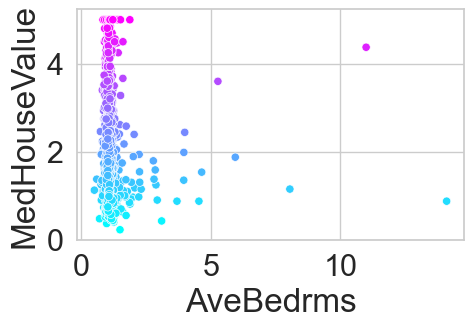

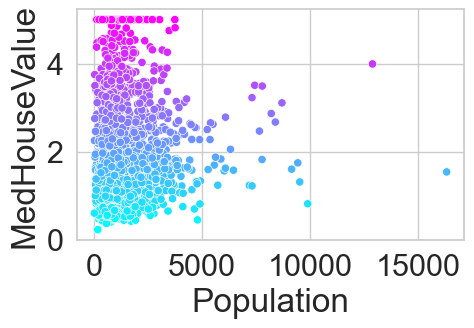

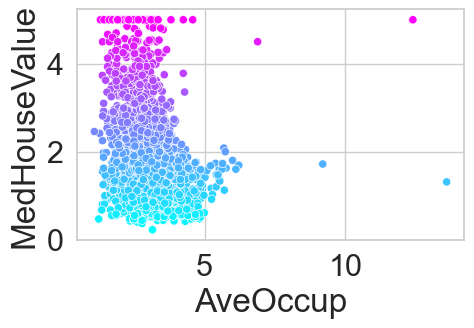

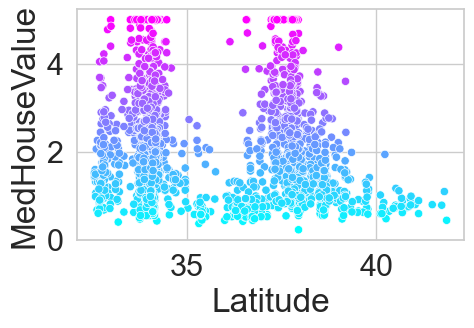

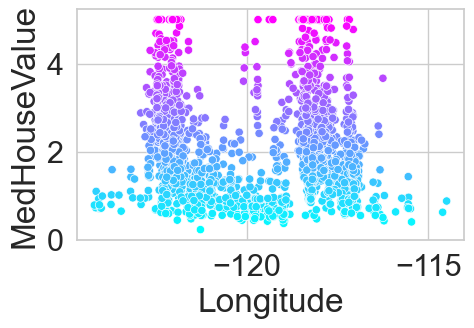

In [4]:
#using matplotlib for visualization

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2)
sns.set_style('whitegrid')

for feature in housing.feature_names:
    plt.figure(figsize=(5, 3))
    sns.scatterplot(data=sample_df, x=feature,y='MedHouseValue',
                    hue='MedHouseValue', palette='cool', legend=False)

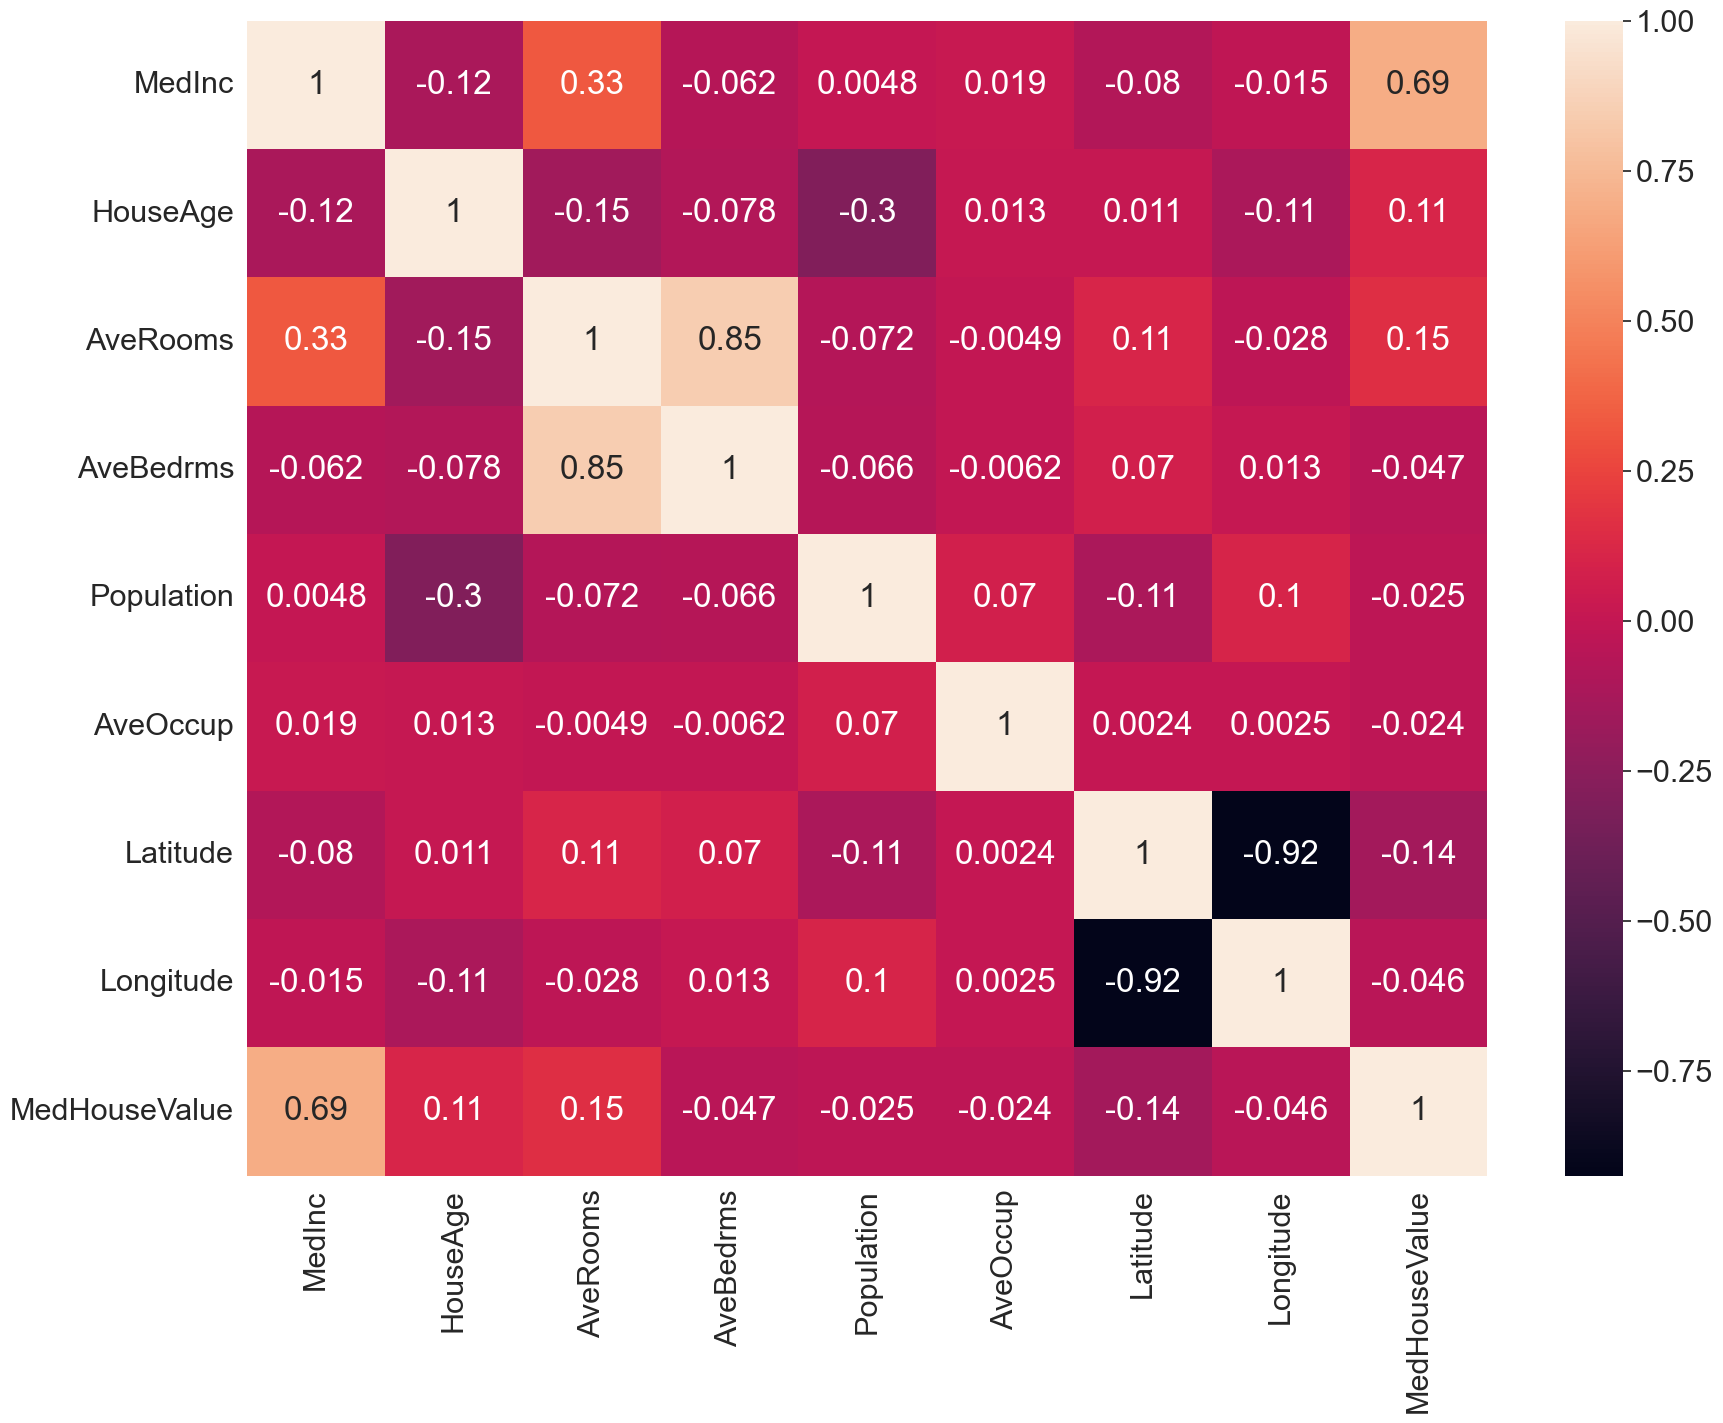

Relevant features:


MedInc           0.688075
HouseAge         0.105623
AveRooms         0.151948
AveBedrms        0.046701
Latitude         0.144160
Longitude        0.045967
MedHouseValue    1.000000
Name: MedHouseValue, dtype: float64

In [5]:
# Feature Selection & Correlation Matrix
corr_matrix = housing_df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, annot=True)
plt.show()

# Our goal is to find the features with a correlation value close to 0
# with the MedHouseValue target and eliminate them.
cor_target = abs(corr_matrix["MedHouseValue"])
relevant_features = cor_target[cor_target>0.03]
print("Relevant features:")
relevant_features

In [6]:
#to_drop = cor_target[cor_target<0.03]
#print("Features to drop:")
#to_drop

In [7]:
#type(to_drop)
#to_drop_frame = to_drop.to_frame()
#row_names = to_drop_frame.index
#row_names_list = list(row_names)
#row_names_list.append('MedHouseValue')
#y = housing_df['MedHouseValue'].values
#X = housing_df.drop(row_names_list, axis=1).values
#print(X.shape, y.shape)

In [8]:
# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the model
model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu', name="h_1"))
model.add(BatchNormalization())
model.add(Dense(128, kernel_regularizer=regularizers.l2(0.0001), activation='relu', name="h_2"))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu', name="h_3"))
model.add(BatchNormalization())
model.add(Dense(32, kernel_regularizer=regularizers.l2(0.0001), activation='relu', name="h_4"))
model.add(BatchNormalization())
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer="adam")

In [9]:
# Train the model
history = model.fit(X_train, y_train, epochs=250, batch_size=48)

# Test the model
y_pred = model.predict(X_test)

# Print the first 5 predicted and actual values
for i in range(5):
    print(f"Predicted: {y_pred[i][0]:.2f}, Actual: {y_test[i]:.2f}")

Epoch 1/250
409/409 [==============================] - 2s 2ms/step - loss: 1.4138
Epoch 2/250
409/409 [==============================] - 1s 2ms/step - loss: 0.4348
Epoch 3/250
409/409 [==============================] - 1s 2ms/step - loss: 0.3944
Epoch 4/250
409/409 [==============================] - 1s 2ms/step - loss: 0.3798
Epoch 5/250
409/409 [==============================] - 1s 2ms/step - loss: 0.3700
Epoch 6/250
409/409 [==============================] - 1s 2ms/step - loss: 0.3535
Epoch 7/250
409/409 [==============================] - 1s 2ms/step - loss: 0.3491
Epoch 8/250
409/409 [==============================] - 1s 2ms/step - loss: 0.3465
Epoch 9/250
409/409 [==============================] - 1s 2ms/step - loss: 0.3401
Epoch 10/250
409/409 [==============================] - 1s 2ms/step - loss: 0.3411
Epoch 11/250
409/409 [==============================] - 1s 2ms/step - loss: 0.3377
Epoch 12/250
409/409 [==============================] - 1s 2ms/step - loss: 0.3281
Epoch 13/250


409/409 [==============================] - 1s 2ms/step - loss: 0.2289
Epoch 100/250
409/409 [==============================] - 1s 2ms/step - loss: 0.2298
Epoch 101/250
409/409 [==============================] - 1s 2ms/step - loss: 0.2312
Epoch 102/250
409/409 [==============================] - 1s 2ms/step - loss: 0.2272
Epoch 103/250
409/409 [==============================] - 1s 2ms/step - loss: 0.2346
Epoch 104/250
409/409 [==============================] - 1s 2ms/step - loss: 0.2298
Epoch 105/250
409/409 [==============================] - 1s 2ms/step - loss: 0.2312
Epoch 106/250
409/409 [==============================] - 1s 2ms/step - loss: 0.2309
Epoch 107/250
409/409 [==============================] - 1s 2ms/step - loss: 0.2321
Epoch 108/250
409/409 [==============================] - 1s 2ms/step - loss: 0.2270
Epoch 109/250
409/409 [==============================] - 1s 2ms/step - loss: 0.2326
Epoch 110/250
409/409 [==============================] - 1s 2ms/step - loss: 0.2311
Epoch 

409/409 [==============================] - 1s 2ms/step - loss: 0.2086
Epoch 197/250
409/409 [==============================] - 1s 2ms/step - loss: 0.2040
Epoch 198/250
409/409 [==============================] - 1s 2ms/step - loss: 0.2040
Epoch 199/250
409/409 [==============================] - 1s 2ms/step - loss: 0.2026
Epoch 200/250
409/409 [==============================] - 1s 2ms/step - loss: 0.2038
Epoch 201/250
409/409 [==============================] - 1s 2ms/step - loss: 0.2031
Epoch 202/250
409/409 [==============================] - 1s 2ms/step - loss: 0.2003
Epoch 203/250
409/409 [==============================] - 1s 2ms/step - loss: 0.2030
Epoch 204/250
409/409 [==============================] - 1s 2ms/step - loss: 0.2057
Epoch 205/250
409/409 [==============================] - 1s 2ms/step - loss: 0.2035
Epoch 206/250
409/409 [==============================] - 1s 2ms/step - loss: 0.2042
Epoch 207/250
409/409 [==============================] - 1s 2ms/step - loss: 0.2053
Epoch 

In [10]:
layer_names = ["h_1", "h_2", "h_3", "h_4"]

for layer_name in layer_names:
    weights, biases = model.get_layer(layer_name).get_weights()
    print(f"Parameters and bias shape for layer {layer_name}: {weights.shape} and {biases.shape}")
    print(f"Parameters and bias count for layer {layer_name}: {weights.size} and {biases.size}")

Parameters and bias shape for layer h_1: (8, 256) and (256,)
Parameters and bias count for layer h_1: 2048 and 256
Parameters and bias shape for layer h_2: (256, 128) and (128,)
Parameters and bias count for layer h_2: 32768 and 128
Parameters and bias shape for layer h_3: (128, 64) and (64,)
Parameters and bias count for layer h_3: 8192 and 64
Parameters and bias shape for layer h_4: (64, 32) and (32,)
Parameters and bias count for layer h_4: 2048 and 32


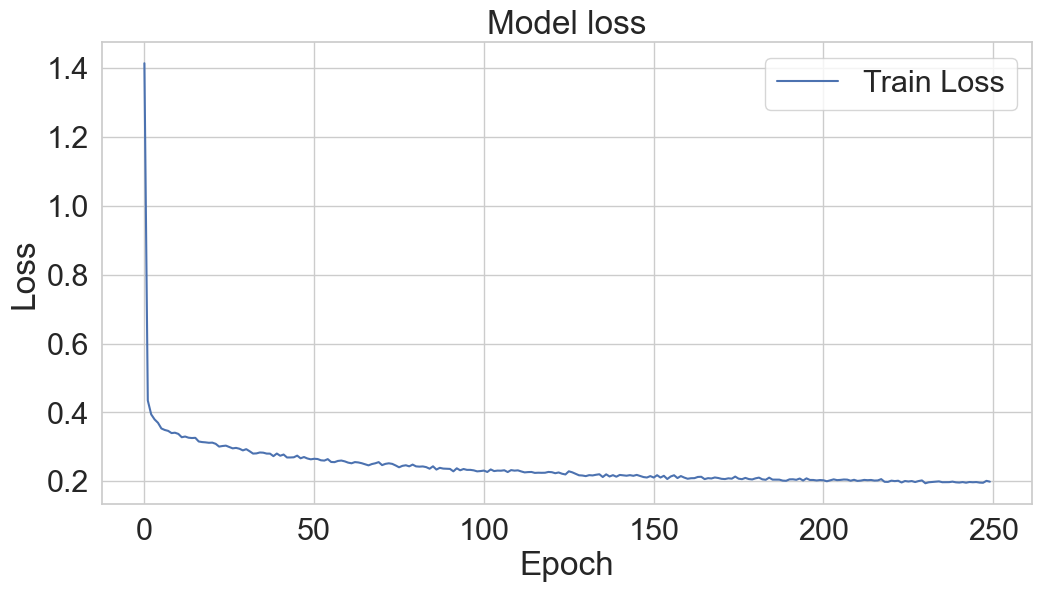

In [11]:
# Plot the loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

In [12]:
from sklearn.metrics import r2_score

# Flatten y_pred to have the same shape as y_test
y_pred = y_pred.flatten()

# Calculate the R-squared error
r2 = r2_score(y_test, y_pred)

print(f"R-squared error: {r2 * 100:.2f}%")

R-squared error: 81.09%


In [13]:
# Select a single instance from the test set

# Set i to see the ith training set predicted value and actual value
i = 789
x_new = X_test[i]
x_new = x_new.reshape(1, -1)

# Use the model to predict the target value of this instance
y_pred = model.predict(x_new)

print(f"Predicted value: {y_pred[0][0]:.3f}, Actual value: {y_test[i]}")

1/1 [==============================] - 0s 16ms/step
Predicted value: 2.382, Actual value: 2.322


Assignments

a. Using a real world dataset from Scikit-Learn, develop a classifier using Sequential API. Train and Test the model.

b. Using a toy dataset from Scikit-Learn, develop a Regression program using Sequential API. Train and Test the model